In [41]:
import pandas as pd
import numpy as np
from scipy import stats
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import linear_model
from sklearn import neighbors
from sklearn.model_selection import cross_val_score

import psycopg2

In [2]:
conn_str = "host={} dbname={} user={} password={}".format('localhost', 'airbnb_la', 'jlanders', '')
conn = psycopg2.connect(conn_str)


In [4]:
columns = ['longitude', 'room_type', 'price', 'number_of_reviews']
table = 'listings'
query = 'select '+', '.join(columns)+' from '+table

select longitude, room_type, price, number_of_reviews from listings


In [5]:
df = pd.read_sql(query, con=conn)

In [8]:
df['room_type_bin'] = [1 if typ == 'Private room' else 0 for typ in df.room_type]

In [14]:
for col in df.columns:
    try:
        df[col] = pd.as_numeric(df[col])
    except:
        print(col)

room_type


In [16]:
X = df[['room_type_bin', 'longitude', 'number_of_reviews']]
# X_normed = pd.DataFrame({'loudness':stats.zscore(music.loudness), 'duration':stats.zscore(music.duration)})

Y = df['price']
# Y_normed=stats.zscore(Y)

In [ ]:
# Trying a different dataset

In [101]:
df2 = pd.read_csv('winequality-red.csv', delimiter=';')

In [113]:
Y = df2.quality
X = df2[['fixed acidity', 'volatile acidity',
        'density', 'alcohol','sulphates']]
#  'total sulfur dioxide','sulphates',
# 'free sulfur dioxide', 'citric acid','total sulfur dioxide','residual sugar','pH','chlorides', 

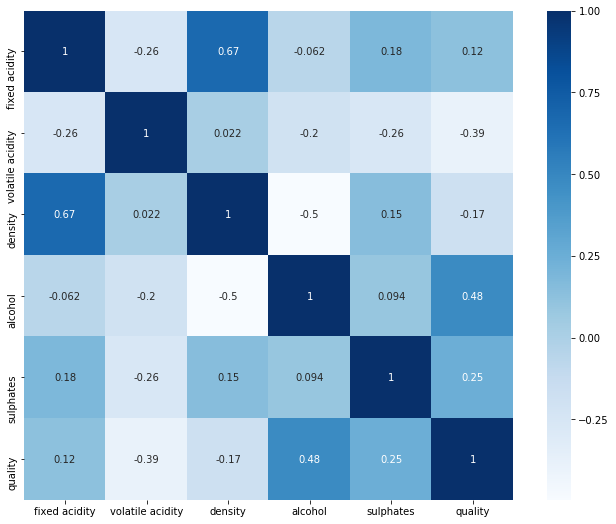

In [112]:
corrmat = df2[['fixed acidity', 'volatile acidity',
        'density', 'alcohol','sulphates','quality']].dropna().corr()

fig, ax = plt.subplots(1,1, figsize = (12,9))
sns.heatmap(corrmat, vmax = 1, square = True, annot=True,cmap='Blues')

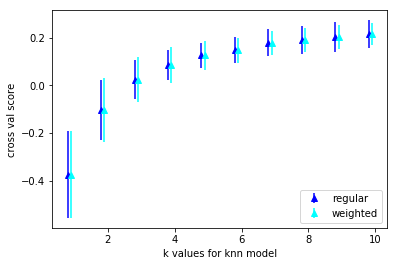

In [114]:

score_d= {'knn':[], 'knn_w':[],'knn_n':[], 'knn_nw':[]}
for n in range(1,11): 
    knn = neighbors.KNeighborsRegressor(n_neighbors=n)
    score = cross_val_score(knn, X, Y, cv=5)
#     print("\nUnweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
    score_d['knn'].append(score)

    knn_w = neighbors.KNeighborsRegressor(n_neighbors=n, weights='distance')
    score = cross_val_score(knn_w, X, Y, cv=5)
#     print("\nWeighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
    score_d['knn_w'].append(score)

#     knn_n = neighbors.KNeighborsRegressor(n_neighbors=n)
#     score = cross_val_score(knn_n, X_normed, Y, cv=5)
# #     print("\nUnweighted normed Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
#     score_d['knn_n'].append(score)
    
#     knn_nw = neighbors.KNeighborsRegressor(n_neighbors=n, weights='distance')
#     score = cross_val_score(knn_nw, X_normed, Y, cv=5)
# #     print("\nWeighted and normed Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
#     score_d['knn_nw'].append(score)

# plt.scatter(list(range(1,10)), [score_d['knn'][ik].mean() for ik in range(len(score_d['knn']))])
plt.errorbar([ik-.2 for ik in range(1,11)], [score_d['knn'][ik].mean() for ik in range(len(score_d['knn']))], [score_d['knn'][ik].std() for ik in range(len(score_d['knn']))], linestyle='None', marker='^', color= 'blue', label = 'regular')
plt.errorbar([ik-.1 for ik in range(1,11)], [score_d['knn'][ik].mean() for ik in range(len(score_d['knn']))], [score_d['knn_w'][ik].std() for ik in range(len(score_d['knn_w']))], linestyle='None', marker='^', color = 'cyan', label='weighted')
# plt.errorbar([ik for ik in range(1,11)], [score_d['knn'][ik].mean() for ik in range(len(score_d['knn']))], [score_d['knn_n'][ik].std() for ik in range(len(score_d['knn_n']))], linestyle='None', marker='^', color = 'red', label='normalized')
# plt.errorbar([ik+.1 for ik in range(1,11)], [score_d['knn'][ik].mean() for ik in range(len(score_d['knn']))], [score_d['knn_nw'][ik].std() for ik in range(len(score_d['knn_nw']))], linestyle='None', marker='^', color = 'magenta', label='normalized and weighted')
plt.legend(loc=4)
plt.xlabel('k values for knn model')
plt.ylabel('cross val score')



In [115]:
from sklearn import svm
clf = svm.SVR()
score = cross_val_score(clf, X, Y, cv=5)
print(score)

/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

[ 0.18160937  0.23980237  0.3418148   0.34515514  0.24913016]


/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [116]:
sgd_reg = linear_model.SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
       epsilon=0.1, eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=1000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)

score = cross_val_score(sgd_reg, X, Y, cv=5)
print(score)

[ 0.11353711  0.26227722  0.30599896  0.31798943  0.23661287]


In [119]:
# x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=3)
regr = linear_model.LinearRegression()
# regr.fit()
score = cross_val_score(regr, X, Y, cv=5)
print(score)

[ 0.08790632  0.2979837   0.35027584  0.36065208  0.28242949]


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)
